----------
**Mini Project 3: K-Nearest Neighbors Classifier-Pima Indians Diabetes**
===========================================================

----------

# What is diabetes ? 
Acccording to NIH, "**Diabetes** is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.

Sometimes people call diabetes “a touch of sugar” or “borderline diabetes.” These terms suggest that someone doesn’t really have diabetes or has a less serious case, but every case of diabetes is serious.

**What are the different types of diabetes?**
The most common types of diabetes are type 1, type 2, and gestational diabetes.

**Type 1 diabetes**
If you have type 1 diabetes, your body does not make insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

**Type 2 diabetes**
If you have type 2 diabetes, your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.

**Gestational diabetes**
Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.

**Other types of diabetes**
Less common types include monogenic diabetes, which is an inherited form of diabetes, and cystic fibrosis-related diabetes ."

# Who is Pima Indians ?

"The Pima (or Akimel O'odham, also spelled Akimel O'otham, "River People", formerly known as Pima) are a group of Native Americans living in an area consisting of what is now central and southern Arizona. The majority population of the surviving two bands of the Akimel O'odham are based in two reservations: the Keli Akimel O'otham on the Gila River Indian Community (GRIC) and the On'k Akimel O'odham on the Salt River Pima-Maricopa Indian Community (SRPMIC)." Wikipedia

![](http://image.noelshack.com/fichiers/2019/06/1/1549305367-0-0-0-0-pima.jpg)

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings

In [2]:
#loading data 
data= pd.read_csv("diabetes.csv")
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
# checking the number of rows and columns
data.shape

(768, 9)

In [4]:
#getting some information about the datafram
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#number of null values in our dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#To check number of uniqe elements in each columns.
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

### data Analises (EDA)

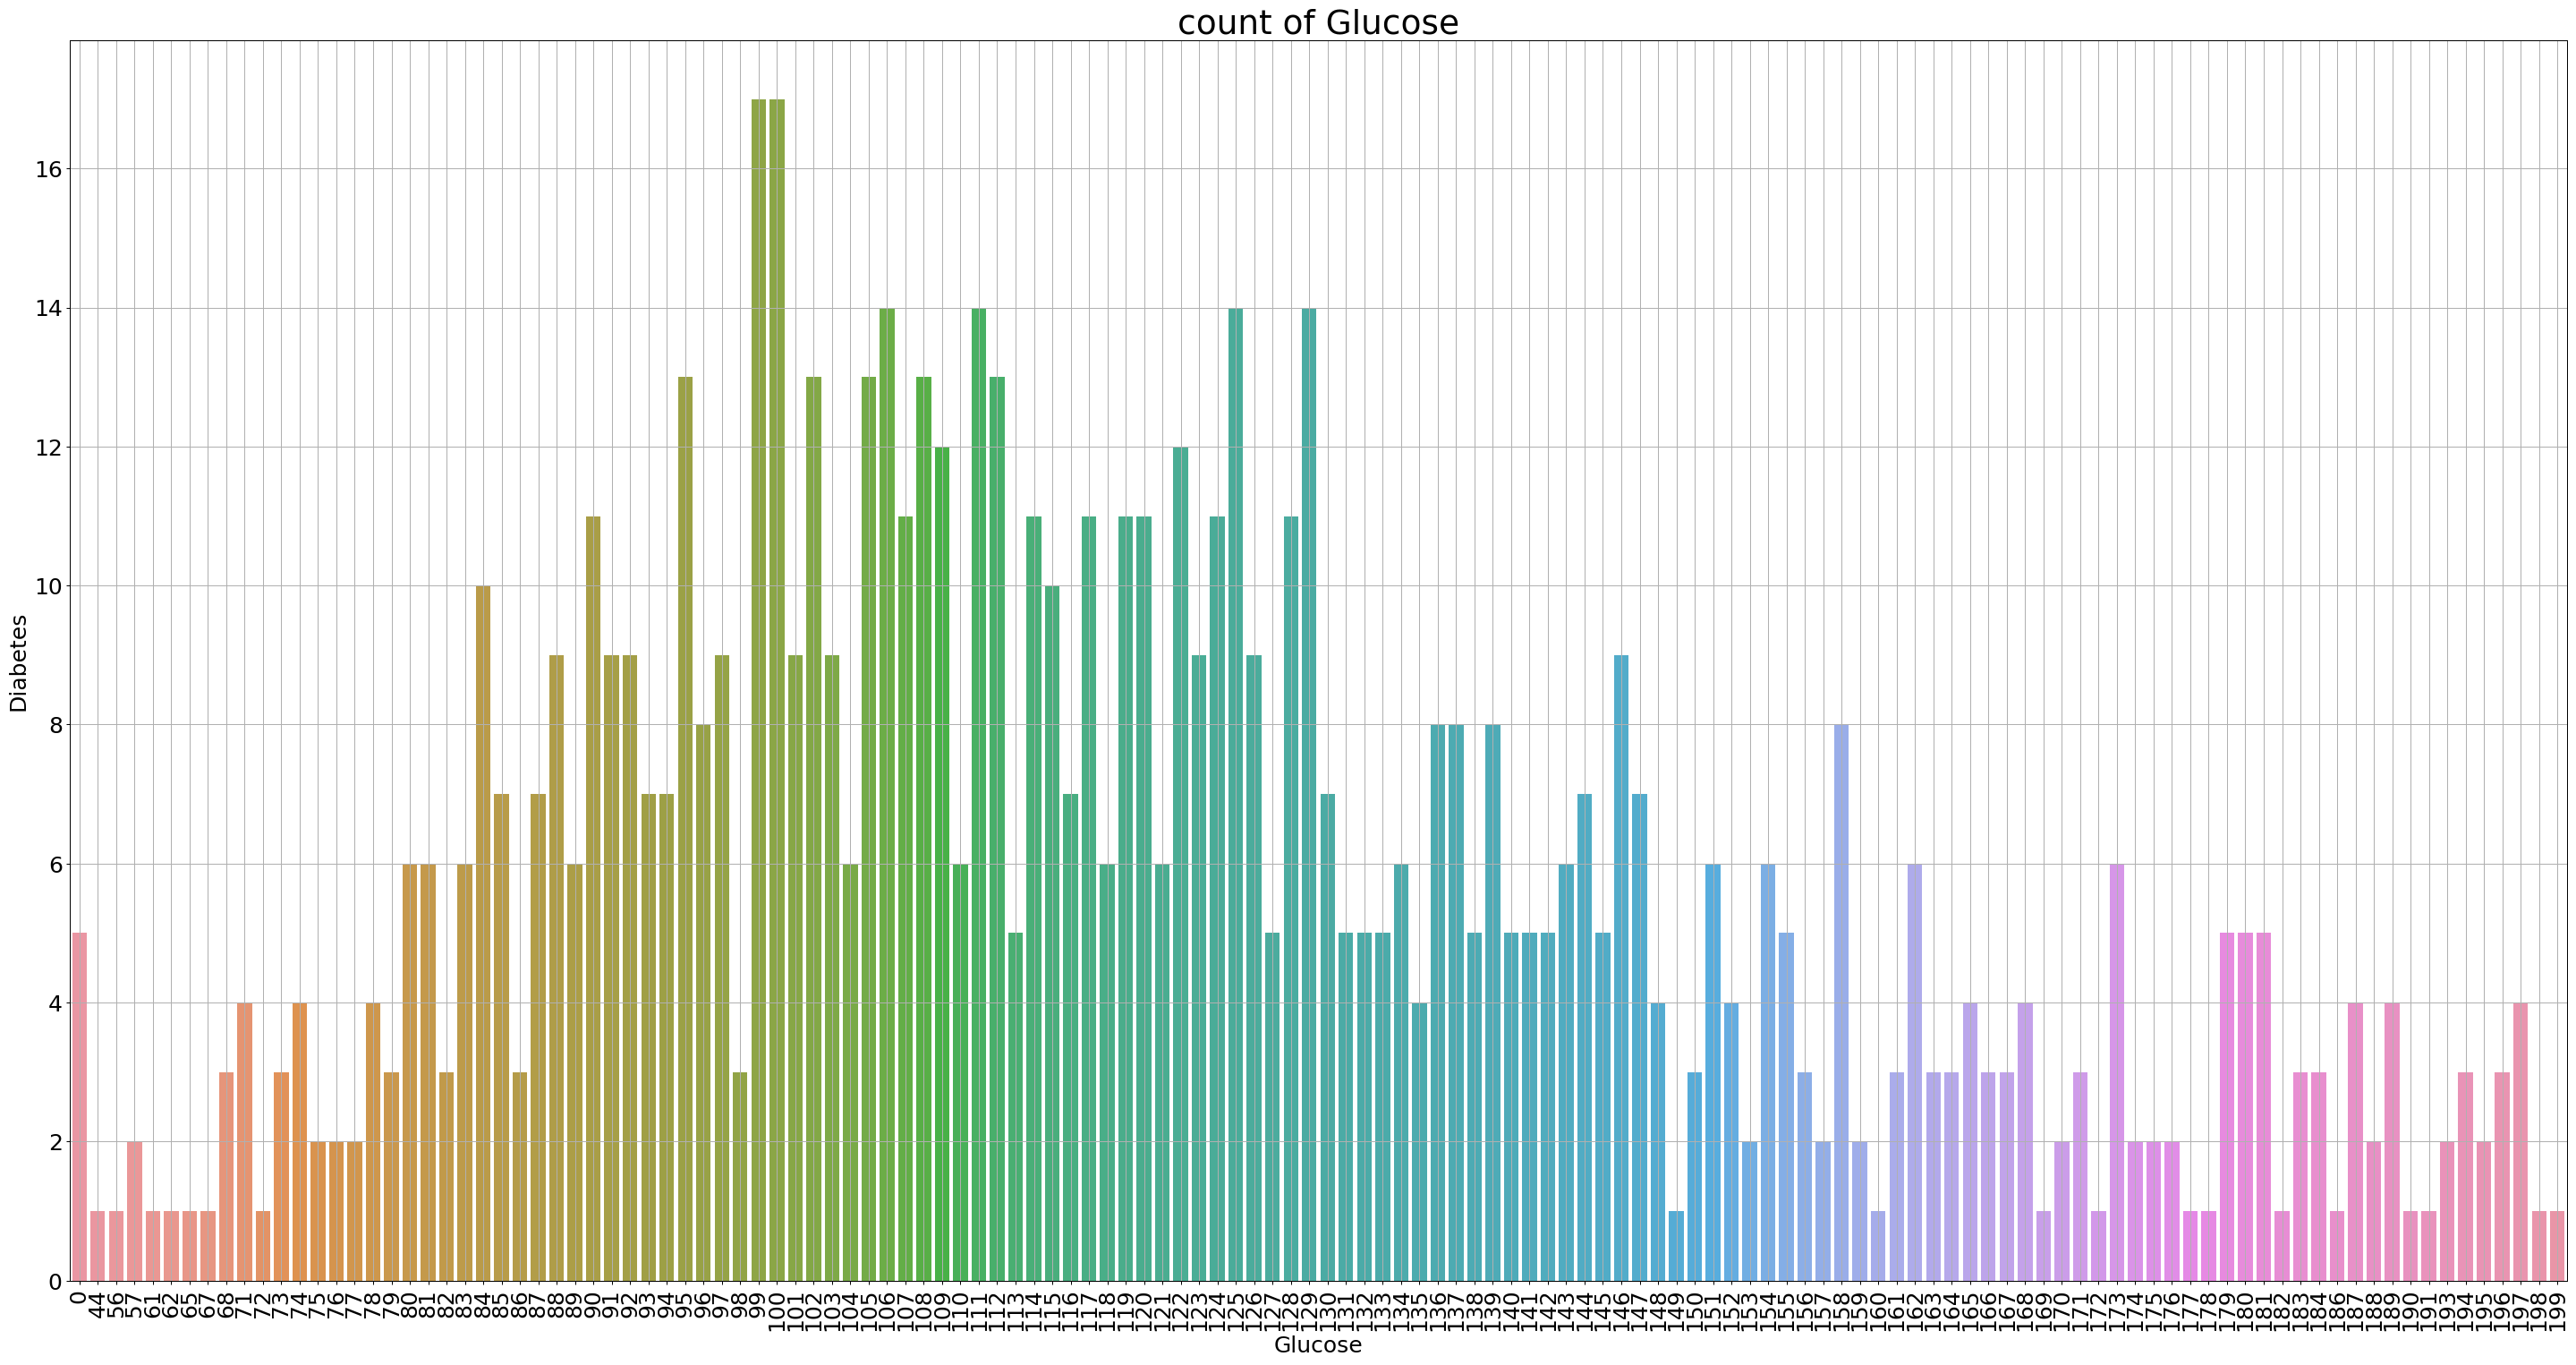

In [7]:
plt.figure(figsize=(40,20),dpi=90)
ax=sns.countplot(x='Glucose',data=data)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Glucose',fontsize=20)
plt.ylabel('Diabetes',fontsize=20)
plt.title('count of Glucose',fontsize=30)
plt.grid()

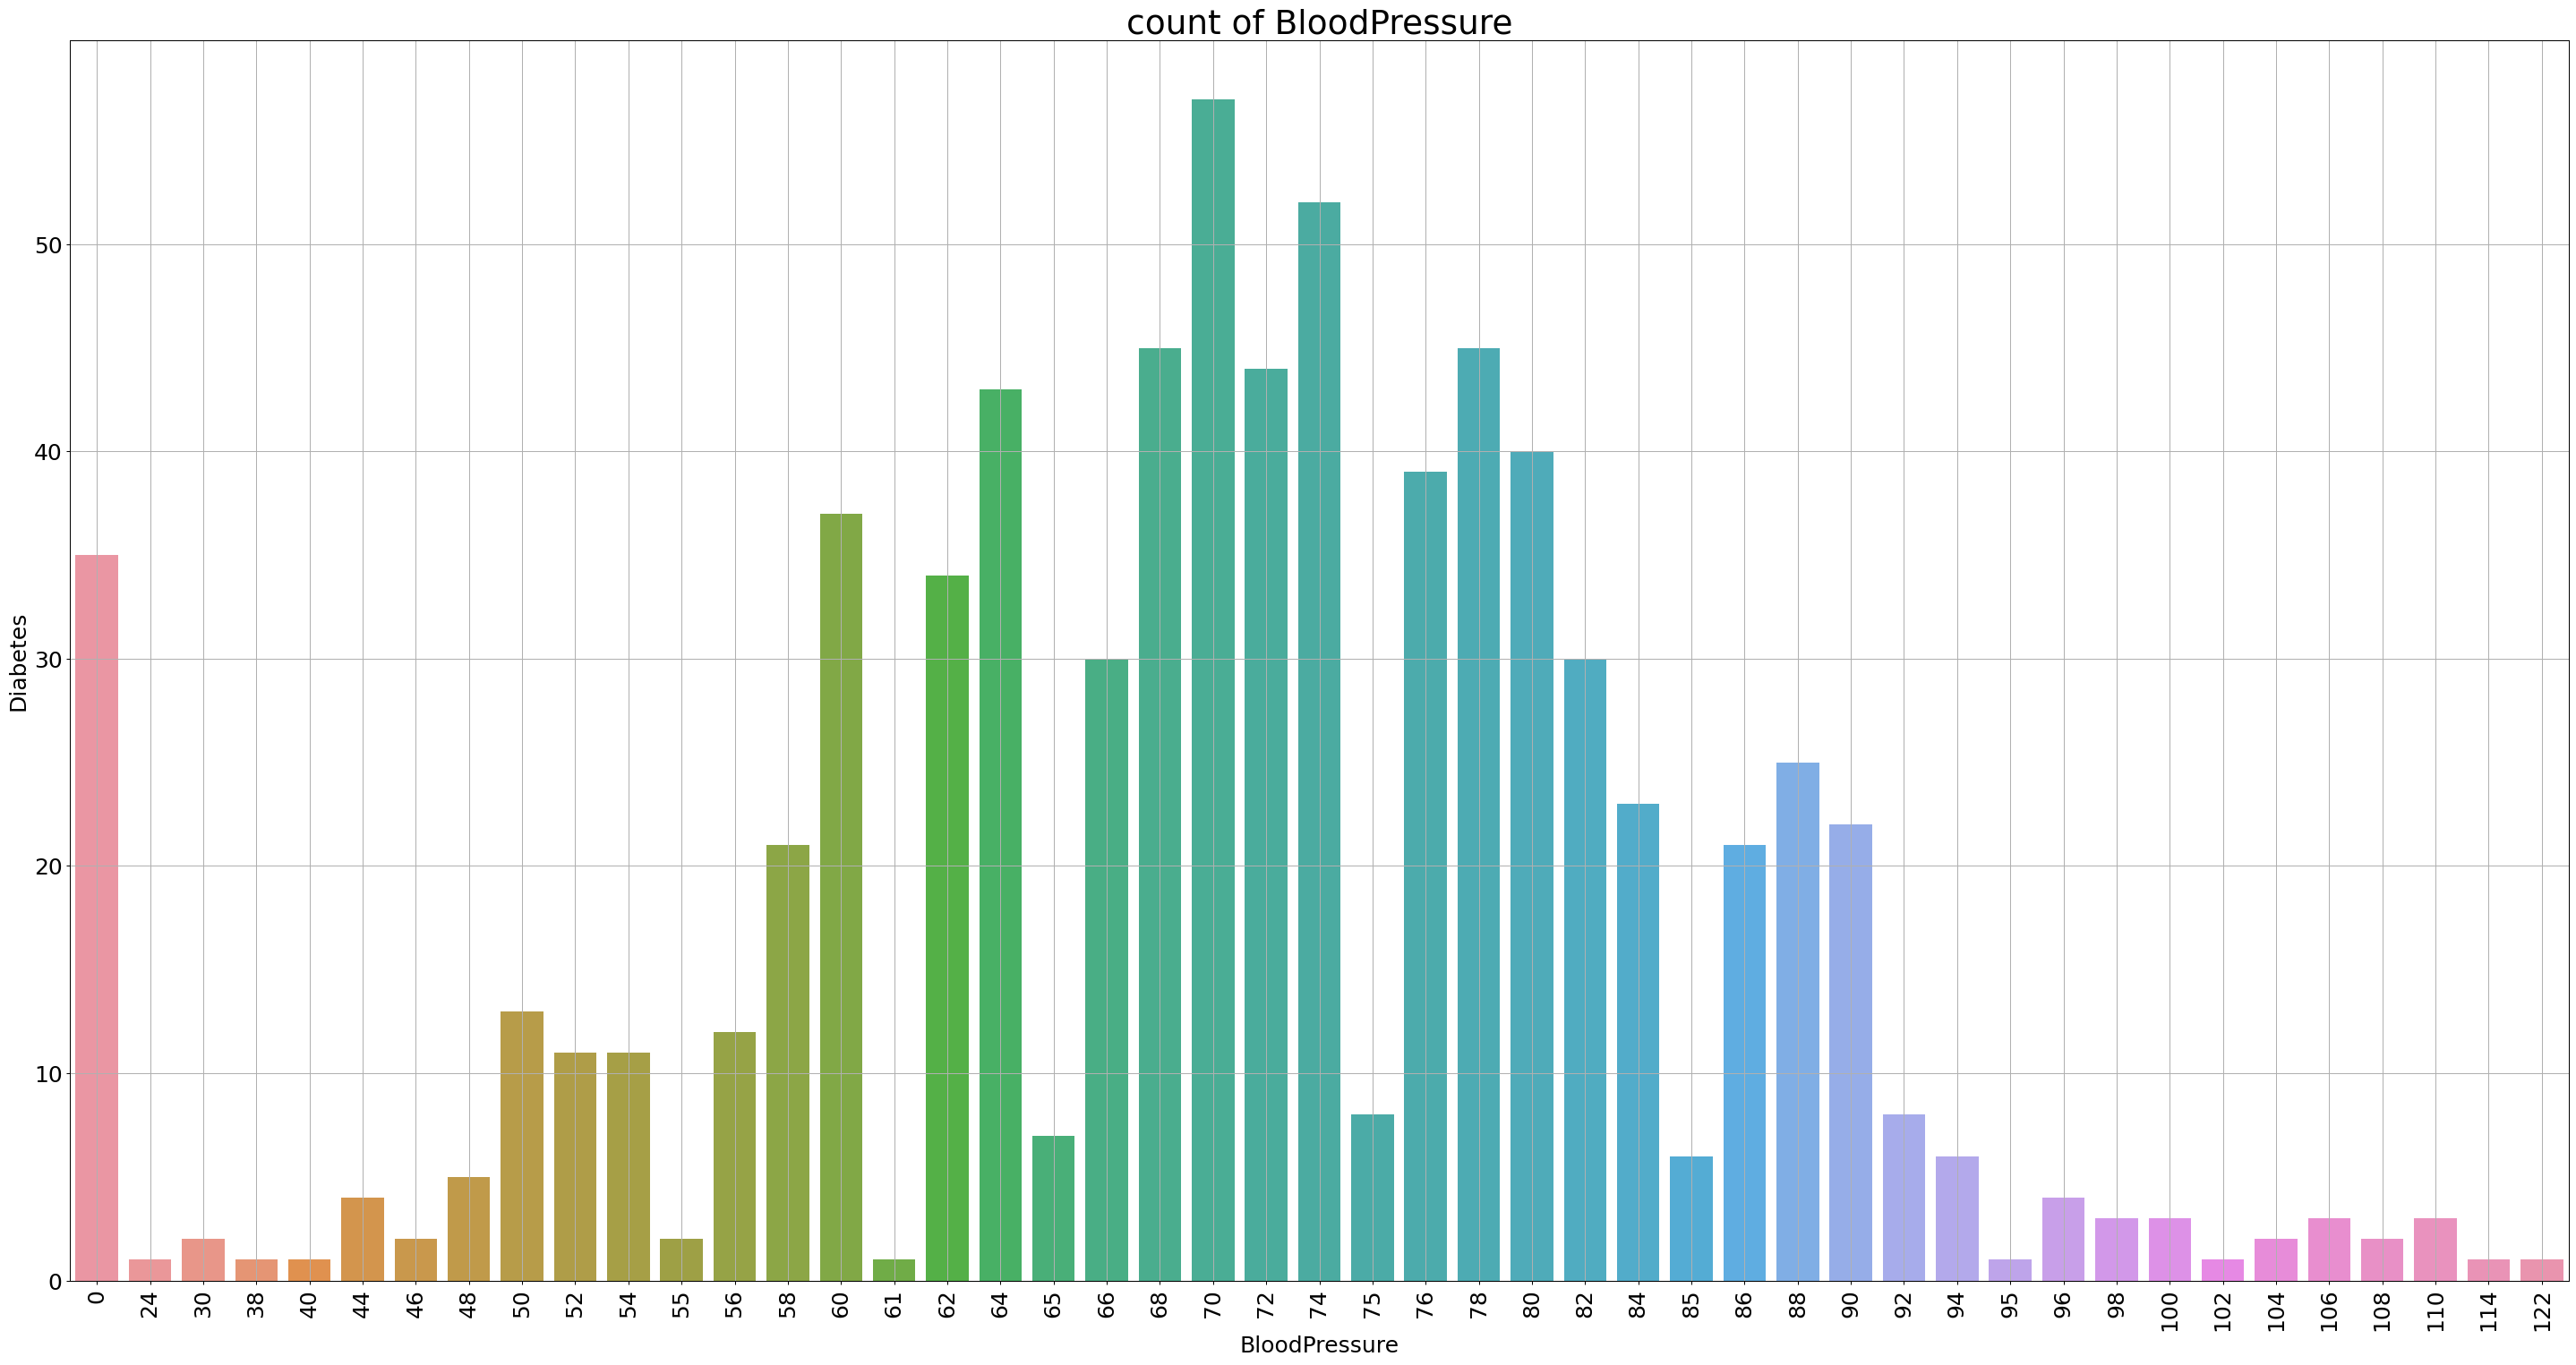

In [8]:
plt.figure(figsize=(40,20),dpi=90)
ax=sns.countplot(x='BloodPressure',data=data)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('BloodPressure',fontsize=20)
plt.ylabel('Diabetes',fontsize=20)
plt.title('count of BloodPressure',fontsize=30)
plt.grid()

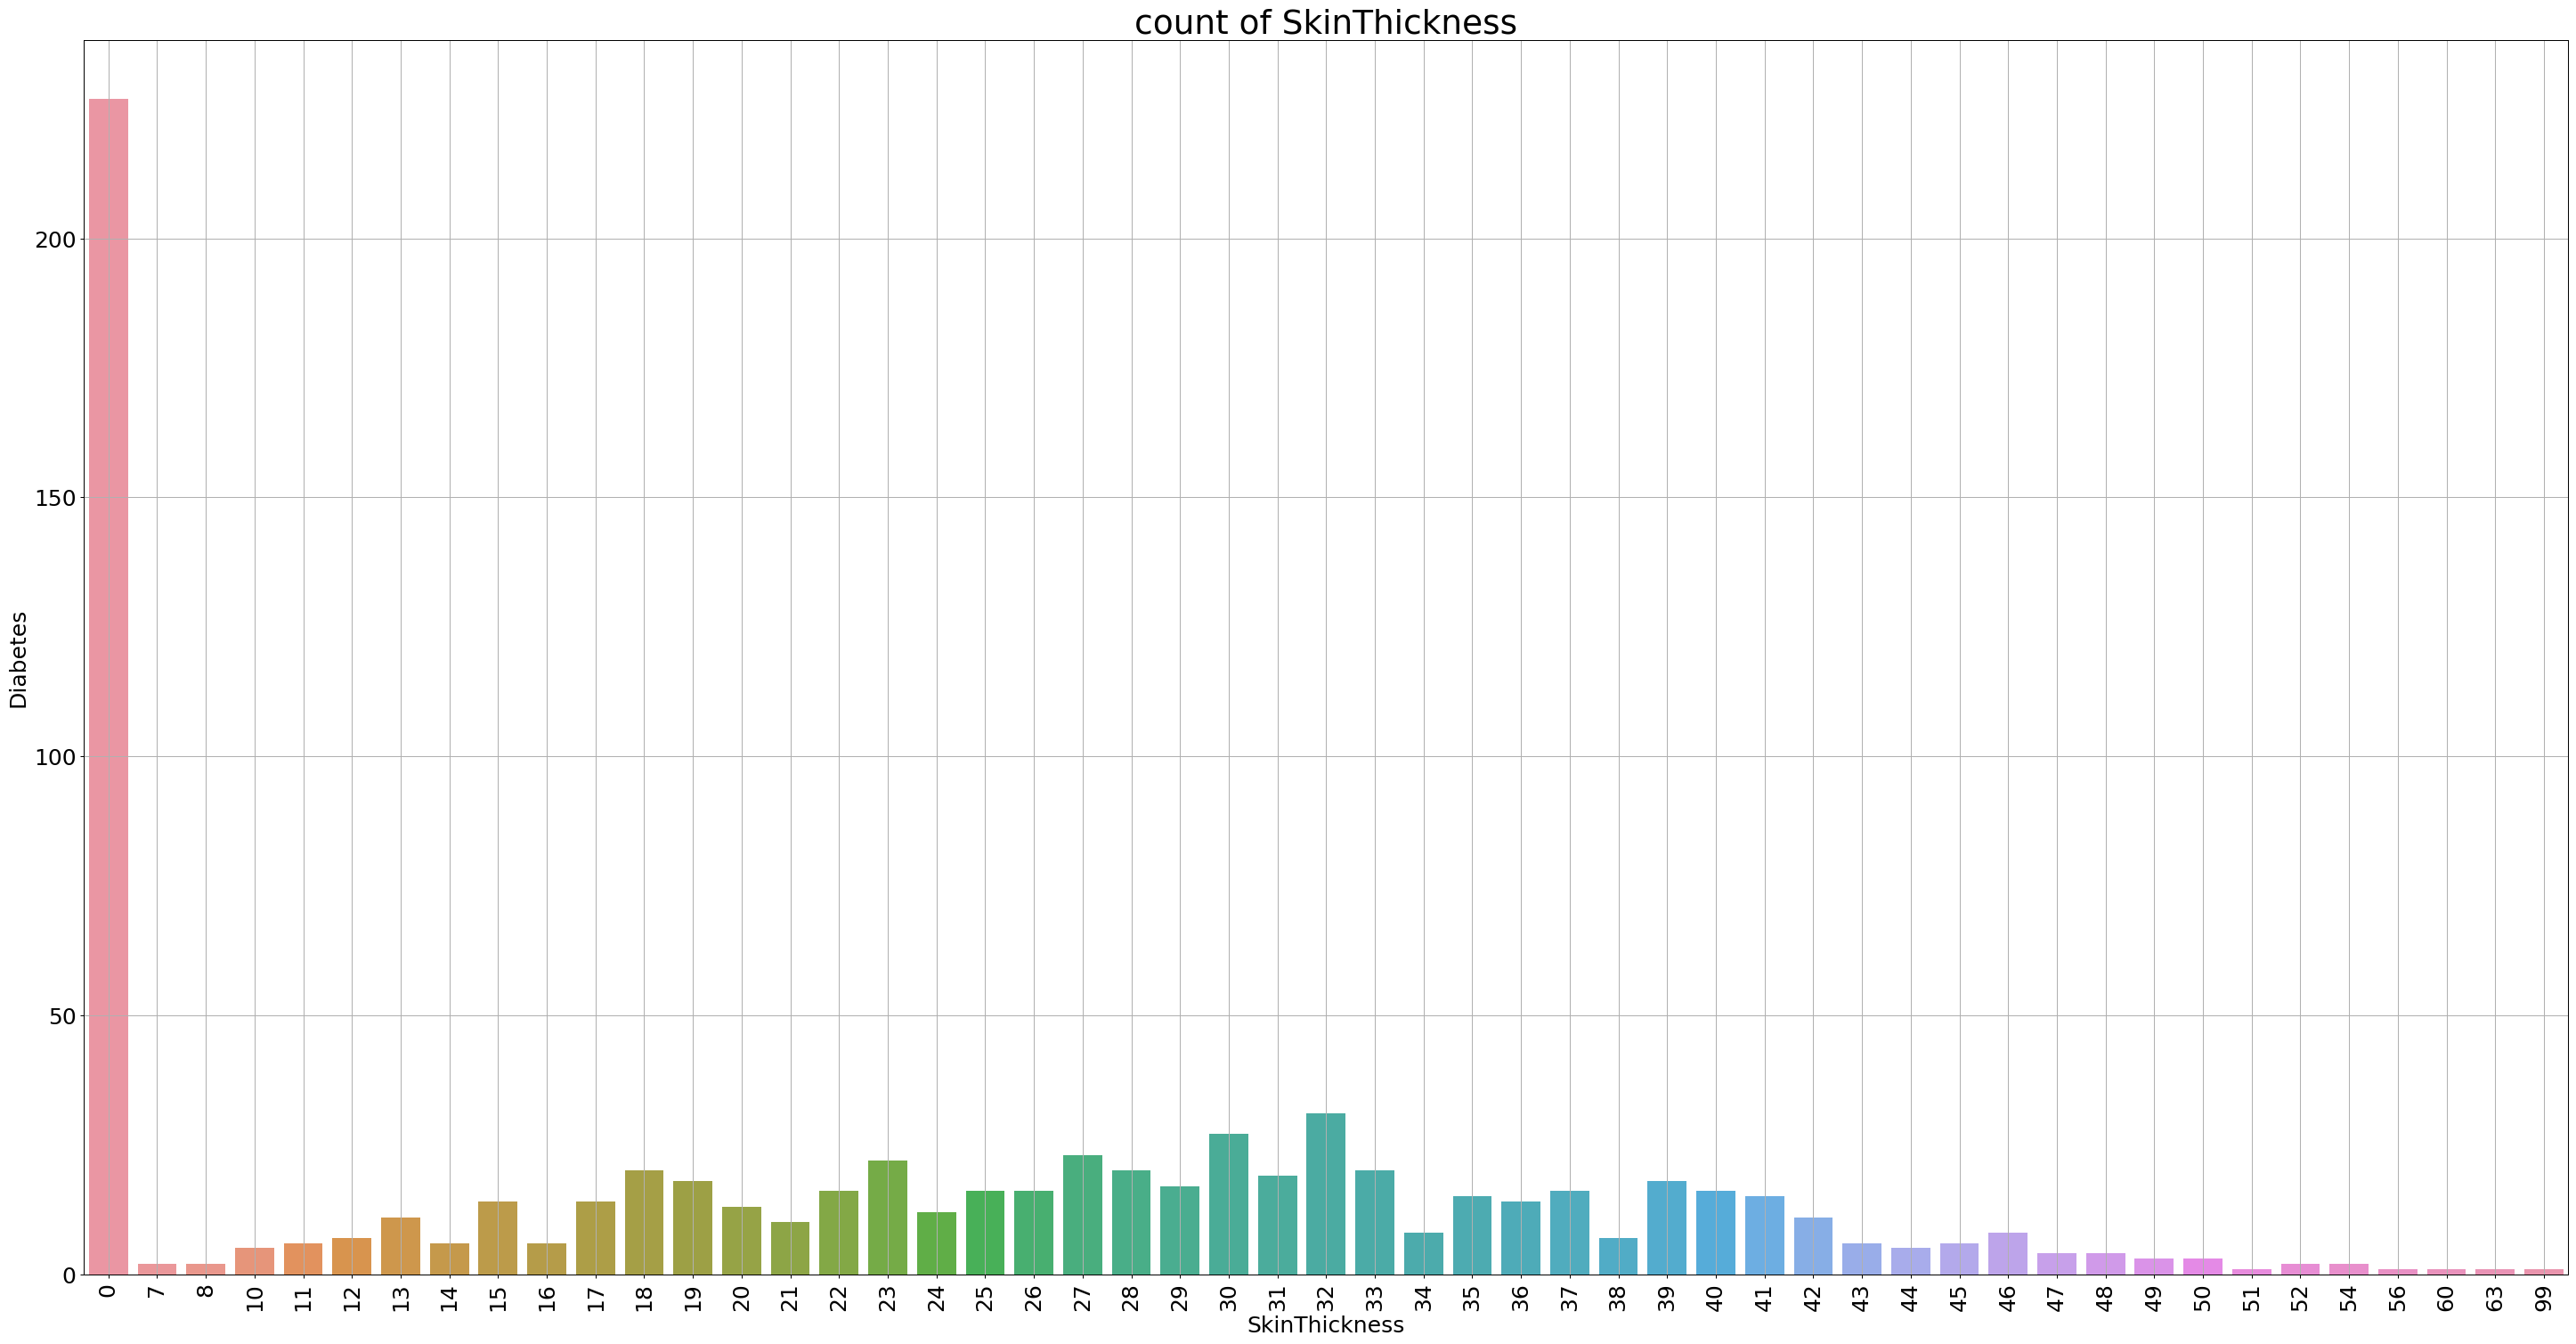

In [9]:
plt.figure(figsize=(40,20),dpi=90)
ax=sns.countplot(x='SkinThickness',data=data)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('SkinThickness',fontsize=20)
plt.ylabel('Diabetes',fontsize=20)
plt.title('count of SkinThickness',fontsize=30)
plt.grid()

#### this chart show that some of sampels have SkinThickness=0, I think this is mistake.

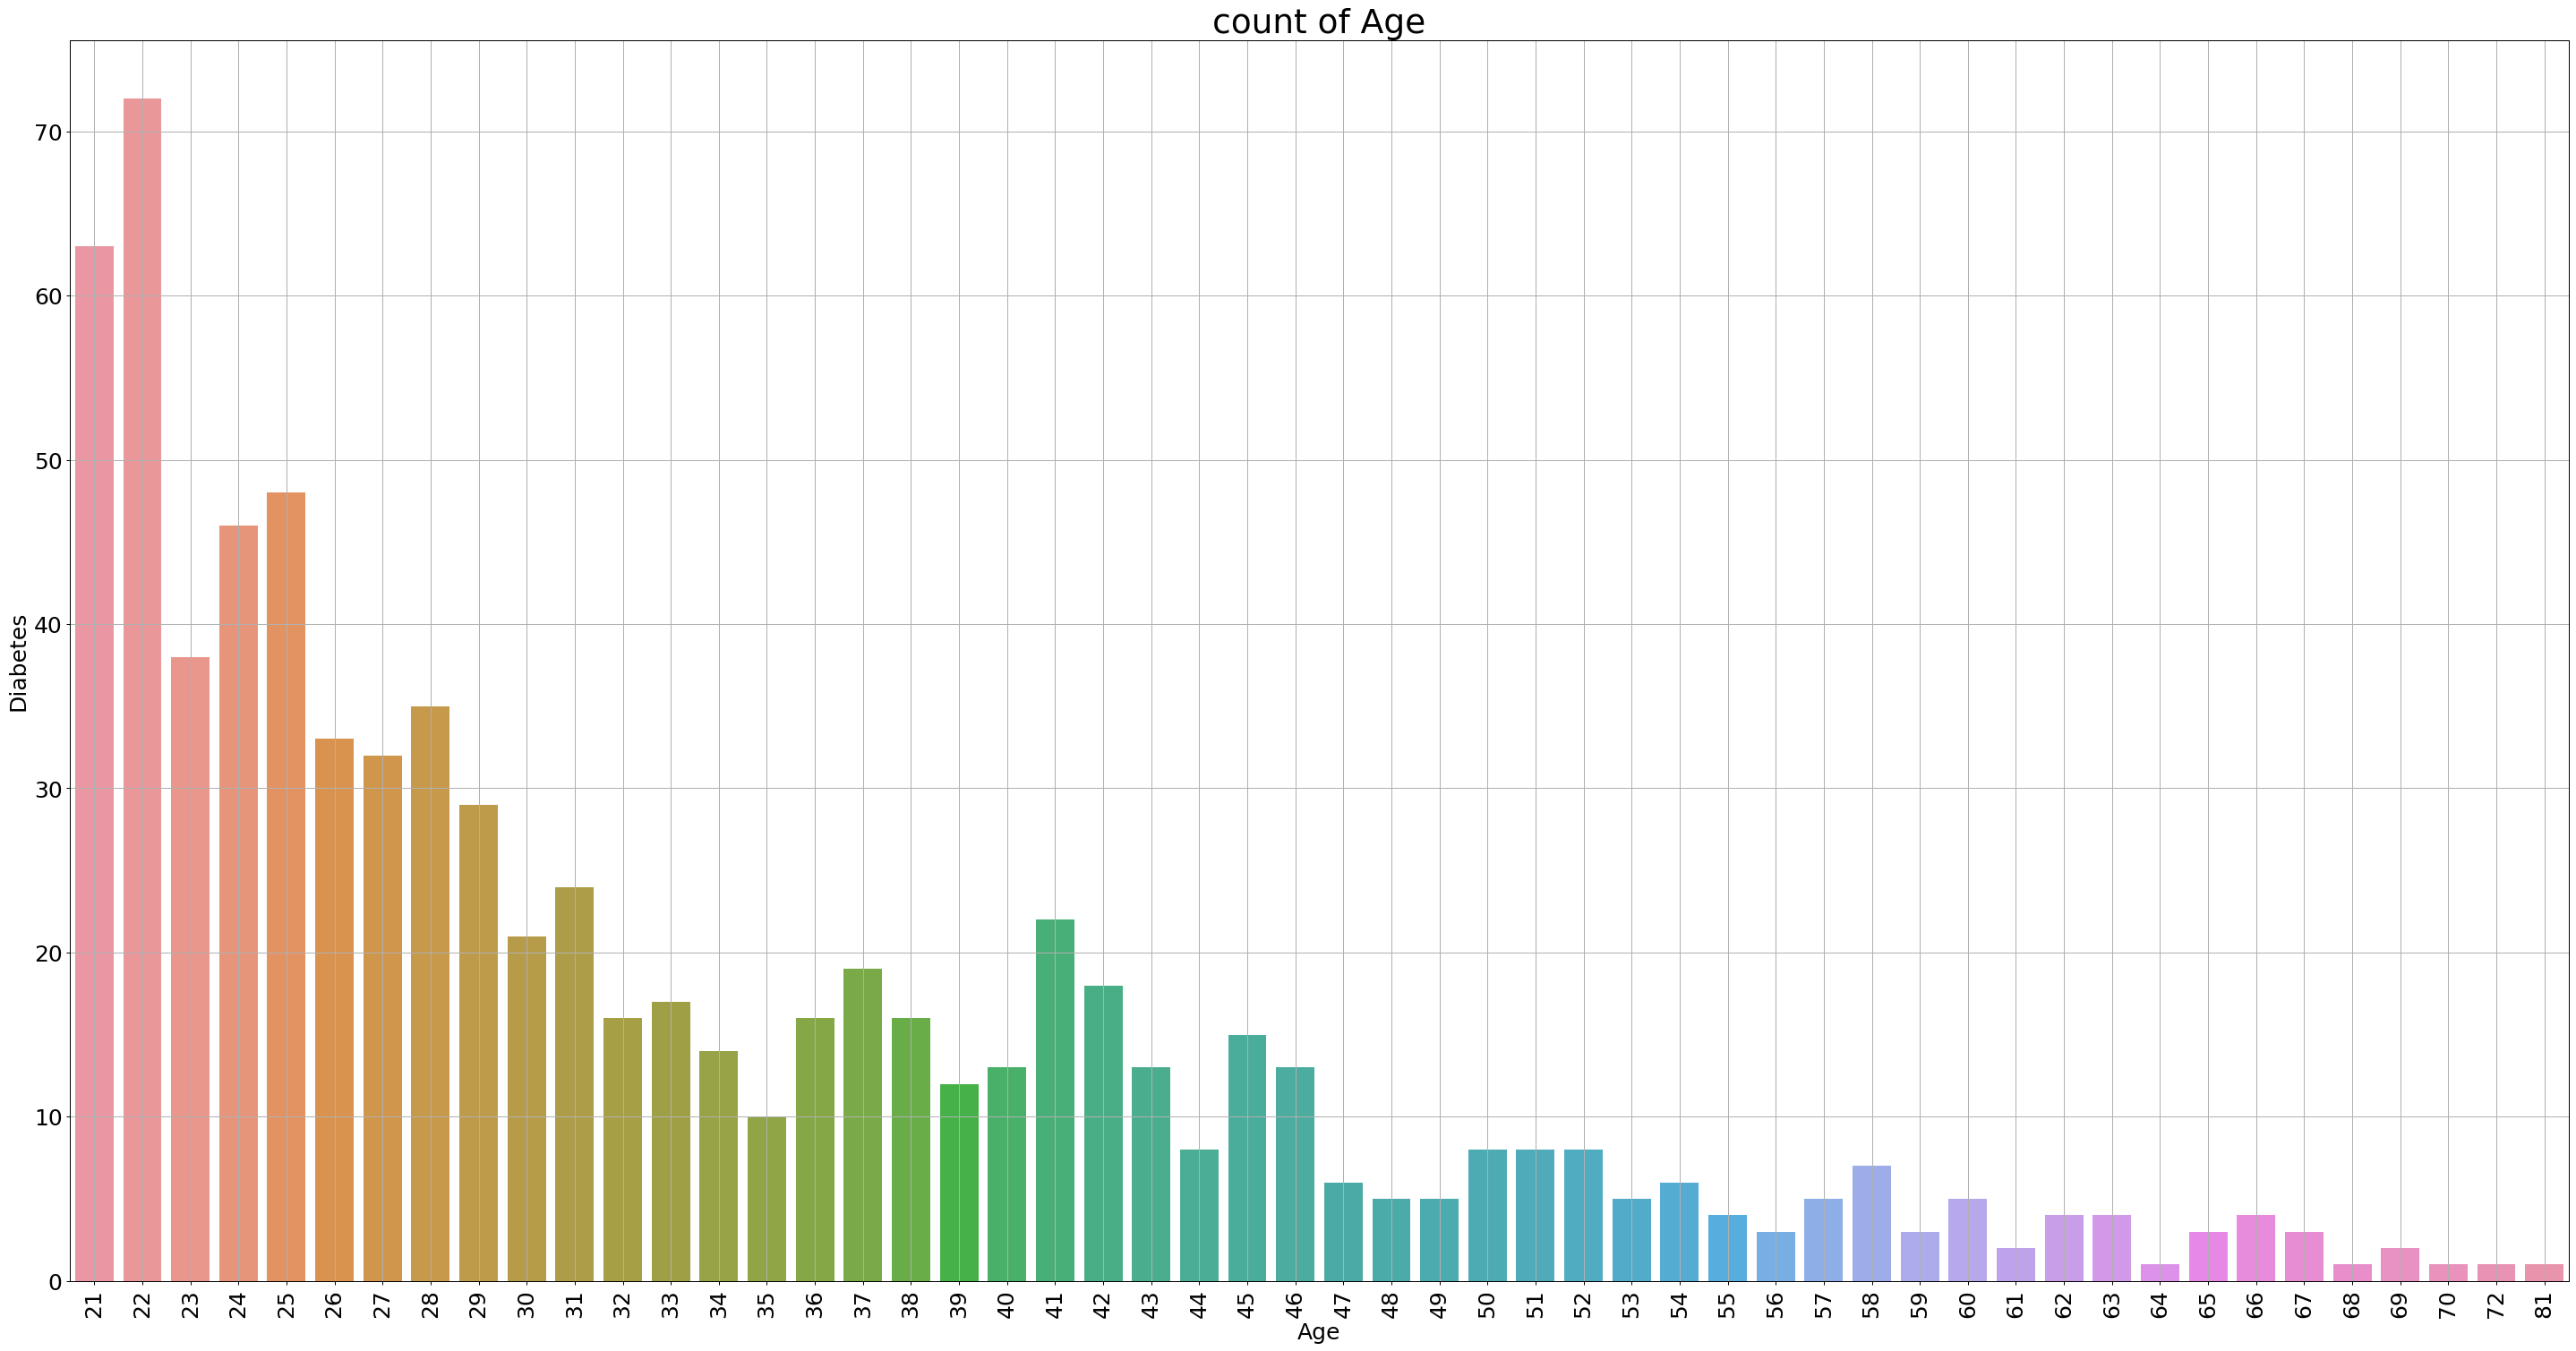

In [10]:
plt.figure(figsize=(40,20),dpi=90)
ax=sns.countplot(x='Age',data=data)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Diabetes',fontsize=20)
plt.title('count of Age',fontsize=30)
plt.grid()

In [11]:
df1=data[data['SkinThickness']>0]
df1=df1[df1['SkinThickness']<90]
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [12]:
df2=df1.dropna(how="any")
df2.reset_index(drop=True, inplace=True)

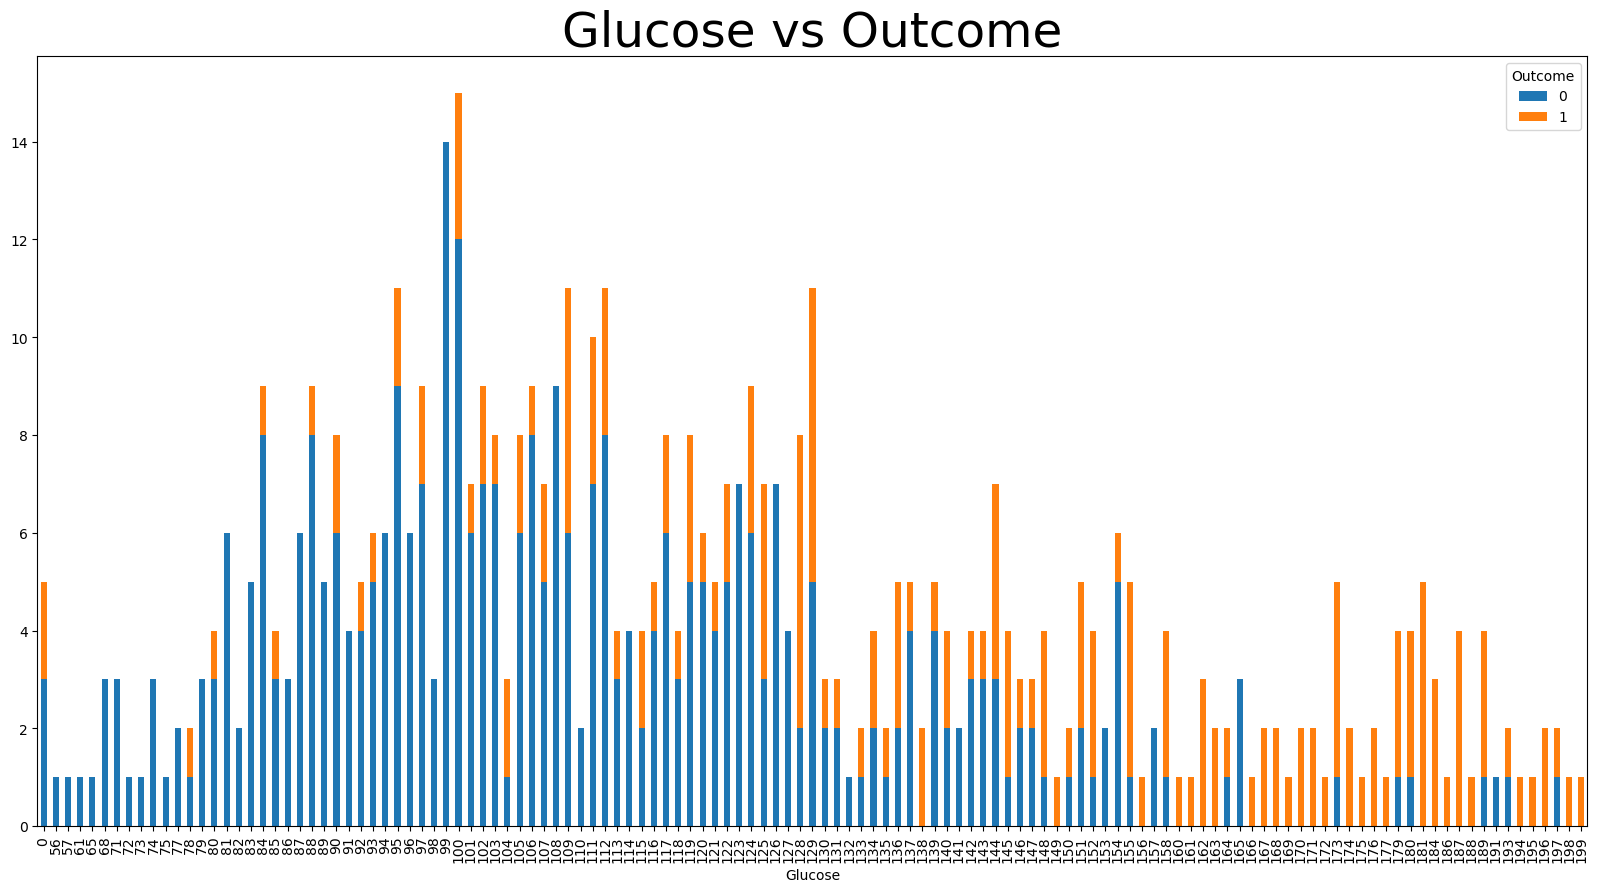

In [13]:
df2.groupby(['Glucose', 'Outcome']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Glucose vs Outcome', fontsize=35)

plt.show()

#### the people with high glucose almost have diabetes

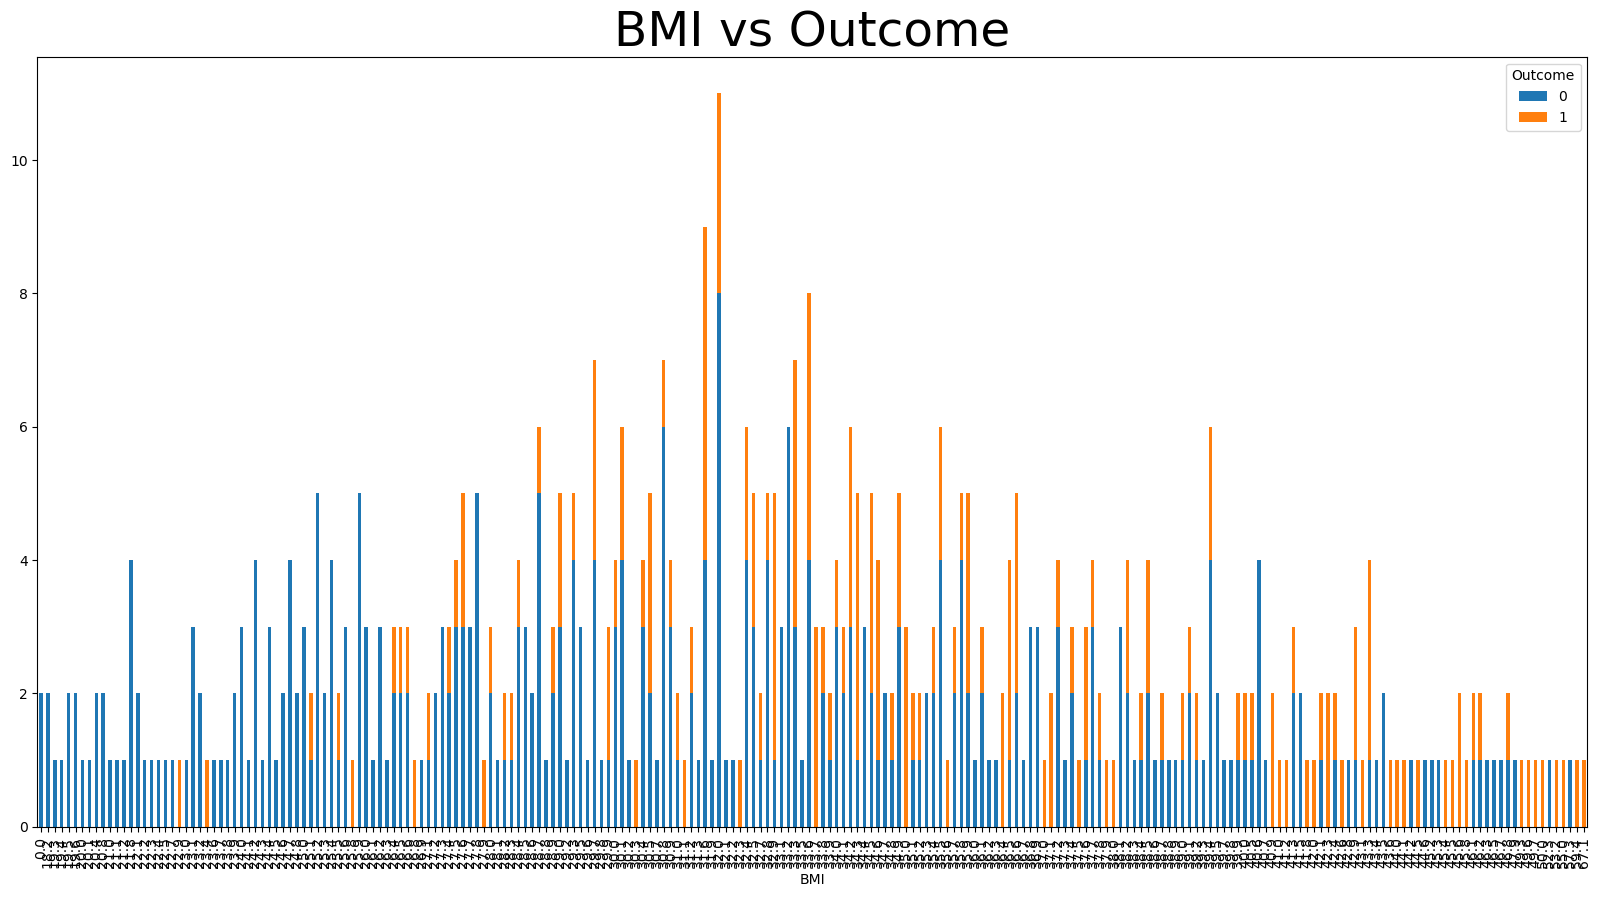

In [14]:
df2.groupby(['BMI', 'Outcome']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('BMI vs Outcome', fontsize=35)

plt.show()

#### the people have low BMI have not diabetes.

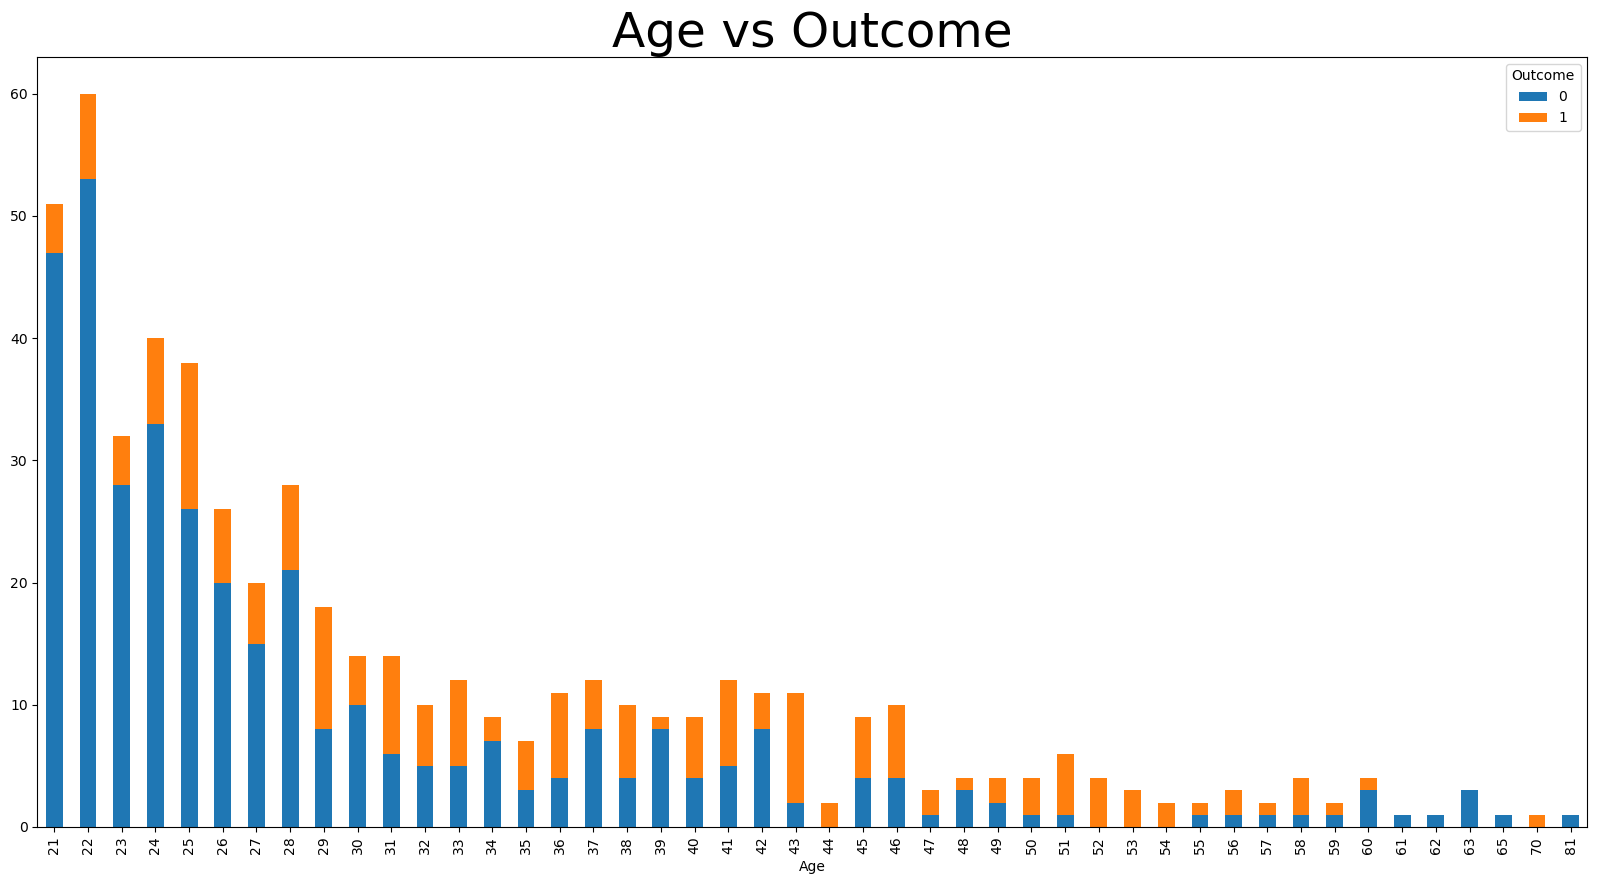

In [15]:
df2.groupby(['Age', 'Outcome']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Age vs Outcome', fontsize=35)

plt.show()

In [16]:
# we will analysise Glucose with other attributes
#make a copy from cols
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
num=cols.copy()
num.remove('Glucose')

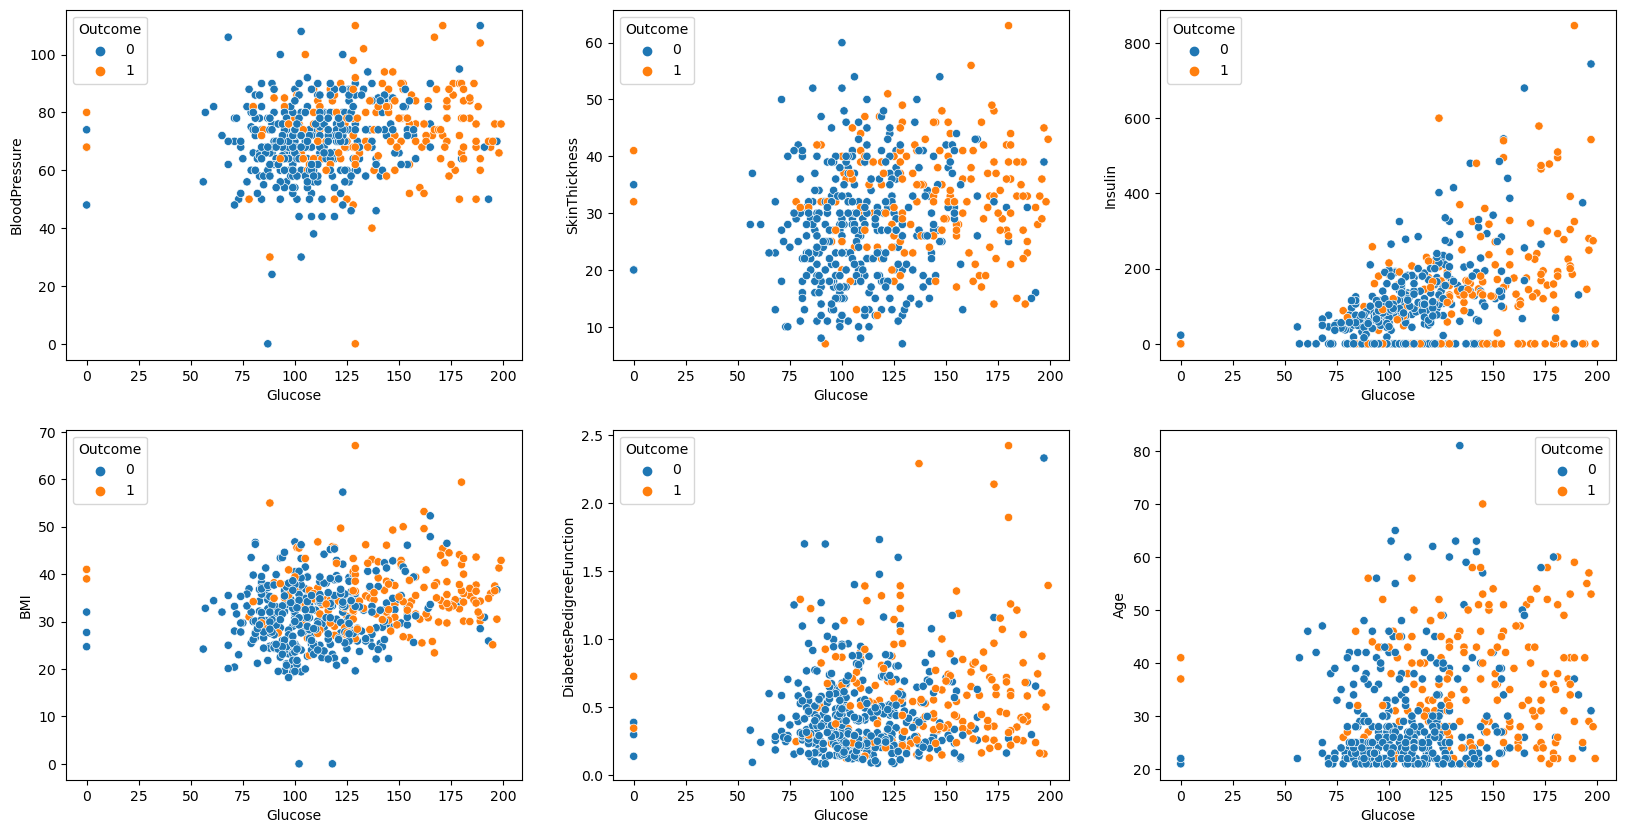

In [17]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(num):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(x='Glucose',y=col,hue='Outcome',data=df2)

In [18]:
# we will analysise BMI with other attributes
#make a copy from cols
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
num=cols.copy()
num.remove('BMI')

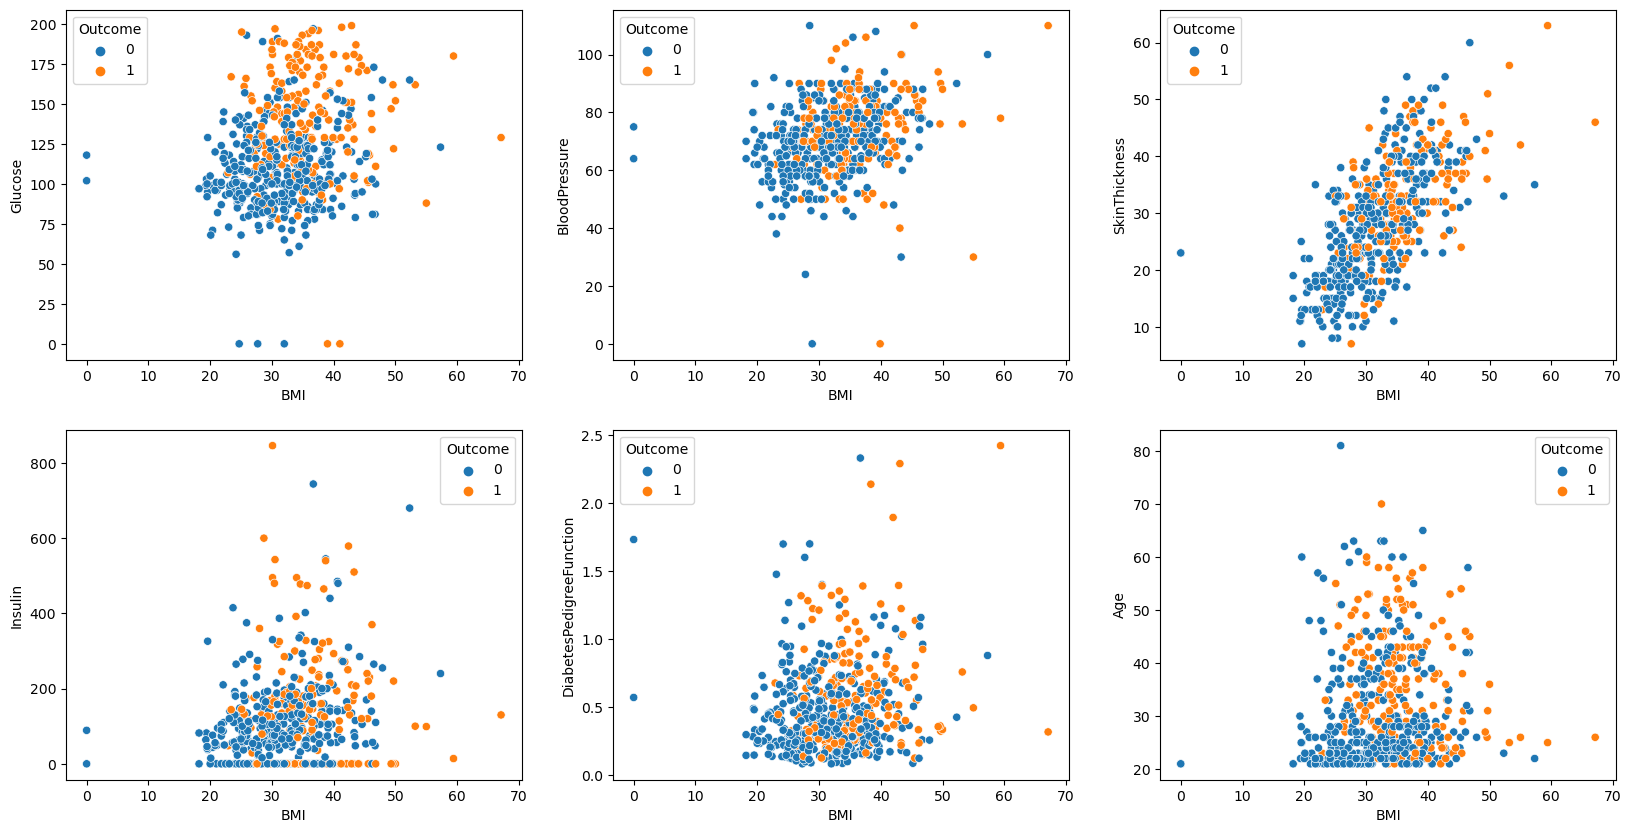

In [19]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(num):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(x='BMI',y=col,hue='Outcome',data=df2)

### correlation

<Axes: >

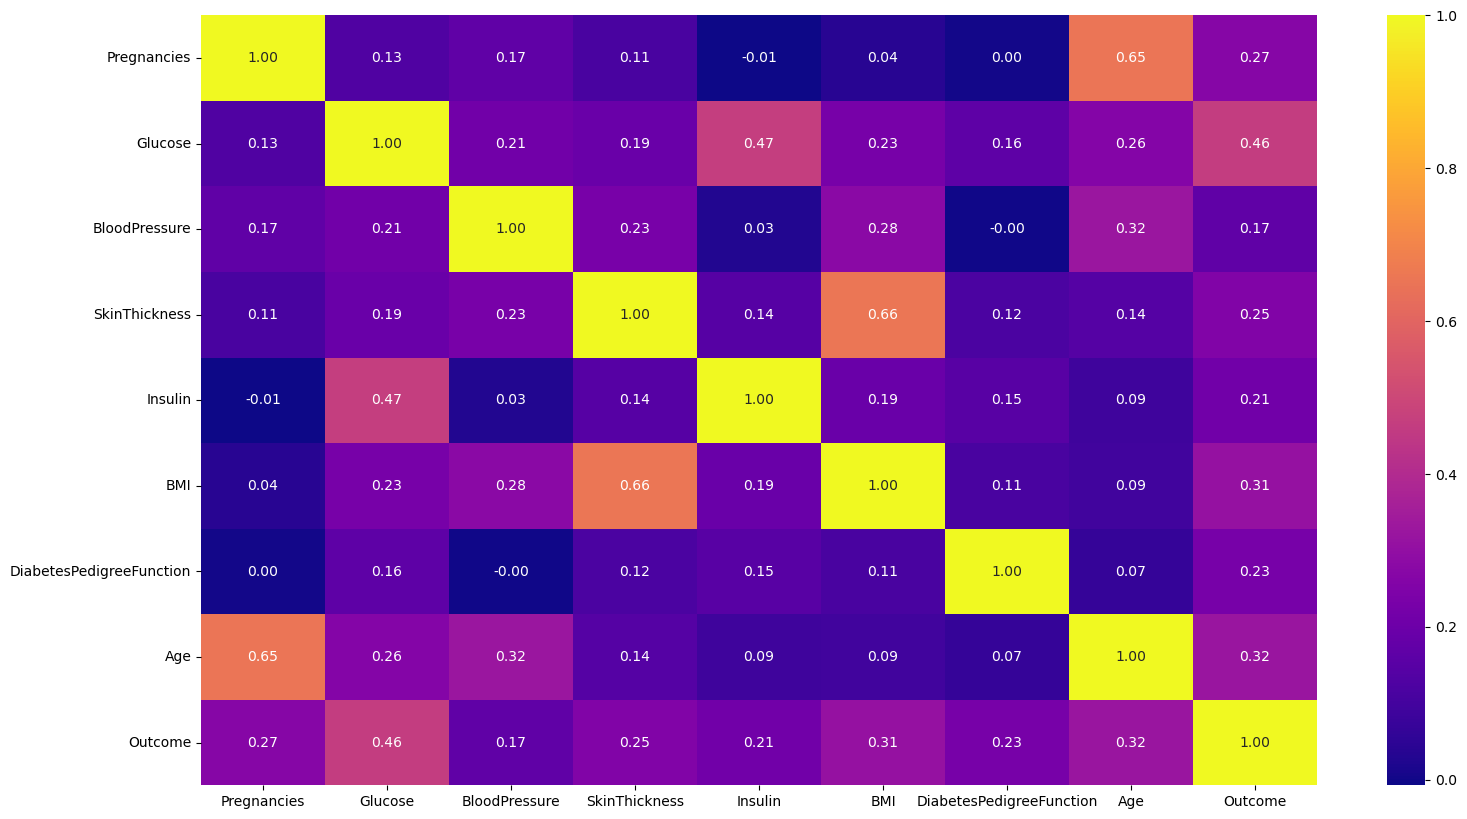

In [20]:
plt.figure(figsize = (18,10))
sns.heatmap(df2.corr(), cmap= 'plasma',annot = True , fmt='.2f' )

### KNN model

In [21]:
# independant variables
x=pd.DataFrame(df2,columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']).values

y=df2.Outcome.values.reshape(-1,1)# Target variable

In [22]:
#split X and y in training and test set in 70:30 ratio
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size= 0.3, random_state=0)

In [23]:
k=5
clf= KNeighborsClassifier(k)
clf.fit(x_train,y_train.ravel())
y_pred=clf.predict (x_test)


In [24]:
print("Accuracy: " ,metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7098765432098766


In [25]:
k=3
clf= KNeighborsClassifier(k)
clf.fit(x_train,y_train.ravel())
y_pred=clf.predict (x_test)

In [26]:
print("Accuracy: " ,metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6975308641975309


In [27]:
k=10
clf= KNeighborsClassifier(k)
clf.fit(x_train,y_train.ravel())
y_pred=clf.predict (x_test)

In [28]:
print("Accuracy: " ,metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7469135802469136


### create a loop to avoid these prosses

In [29]:
k=20   #1 to 20
Acc=np.zeros((k))
for i in range (1, k+1):
    clf= KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train.ravel())
    y_pred=clf.predict (x_test)
    Acc[i-1]=metrics.accuracy_score(y_test,y_pred)
    
Acc

array([0.7037037 , 0.72839506, 0.69753086, 0.7037037 , 0.70987654,
       0.72222222, 0.7345679 , 0.74691358, 0.74074074, 0.74691358,
       0.72839506, 0.7345679 , 0.70987654, 0.7654321 , 0.7345679 ,
       0.77160494, 0.75308642, 0.74691358, 0.72839506, 0.74074074])

In [30]:
print(np.max(Acc))
print(np.min(Acc))

0.7716049382716049
0.6975308641975309


## Another way

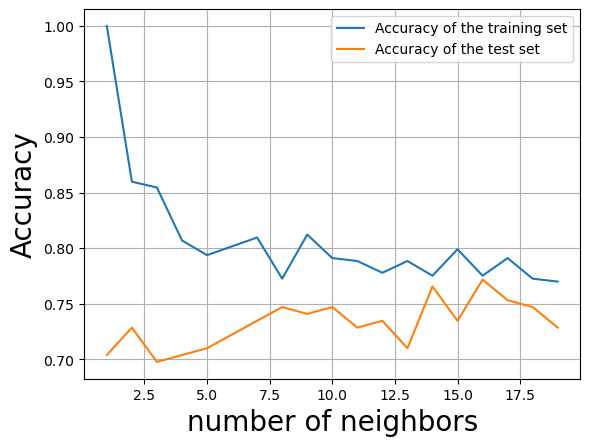

In [31]:
training_acc=[]
test_acc=[]
#try KNN for different k nearest neighbors from 1 to 20.
neighbors_setting= range(1,20)
for n_neighbors in neighbors_setting:
    KNN= KNeighborsClassifier(n_neighbors=n_neighbors)
    KNN.fit(x_train,y_train.ravel())
    training_acc.append(KNN.score(x_train, y_train))
    test_acc.append(KNN.score(x_test, y_test))
    
plt.plot(neighbors_setting,training_acc, label= 'Accuracy of the training set') 
plt.plot(neighbors_setting,test_acc, label= 'Accuracy of the test set') 
plt.xlabel('number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.grid()
plt.legend()
    

In [32]:
k=16
clf= KNeighborsClassifier(k)
clf.fit(x_train,y_train.ravel())
y_pred=clf.predict (x_test)

In [33]:
print("Accuracy: " ,metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7716049382716049


In [34]:
from sklearn.metrics import classification_report,confusion_matrix
clf.classes_

array([0, 1], dtype=int64)

In [35]:
confusion_matrix(y_test,y_pred)

array([[99, 11],
       [26, 26]], dtype=int64)

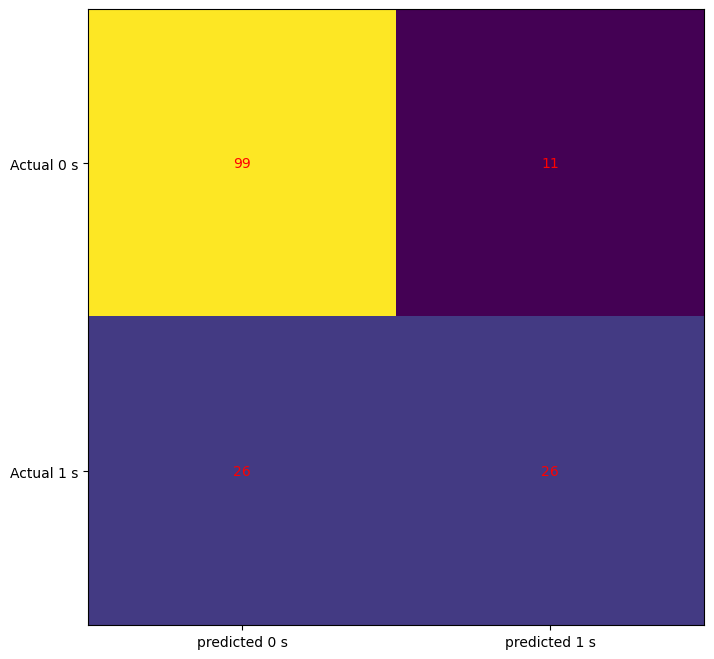

In [36]:
cm=confusion_matrix(y_test,y_pred)
fig,ax=plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0 s' , 'predicted 1 s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0 s' , 'Actual 1 s'))
ax.set_ylim(1.5,-0.5)
for i in range (2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
        
        
plt.show()